Phishing Means Sending Fraud commucations that appear to come from a reputable Source.

       The Internet has become an indispensable part of our life, However, It also has provided opportunities to anonymously perform malicious activities like Phishing. Phishers try to deceive their victims by social engineering or creating mockup websites to steal information such as account ID, username, password from individuals and organizations. Although many methods have been proposed to detect phishing websites, Phishers have evolved their methods to escape from these detection methods. One of the most successful methods for detecting these malicious activities is Machine Learning. This is because most Phishing attacks have some common characteristics which can be identified by machine learning methods.

# Loading required Libraries

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

## Loading the data
Dataset Link: https://www.kaggle.com/eswarchandt/phishing-website-detector .

In [48]:
import os
file_path = "C:/phishing.csv"
print("File exists:", os.path.exists(file_path))

df = pd.read_csv(r"/content/phishing.csv")


File exists: False


In [49]:
df.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


In [50]:
df['class'].value_counts()

,count
class,
1,6157
-1,4897


In [51]:
df.shape

(11054, 32)

In [52]:
df.columns

Index(['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Index                11054 non-null  int64
 1   UsingIP              11054 non-null  int64
 2   LongURL              11054 non-null  int64
 3   ShortURL             11054 non-null  int64
 4   Symbol@              11054 non-null  int64
 5   Redirecting//        11054 non-null  int64
 6   PrefixSuffix-        11054 non-null  int64
 7   SubDomains           11054 non-null  int64
 8   HTTPS                11054 non-null  int64
 9   DomainRegLen         11054 non-null  int64
 10  Favicon              11054 non-null  int64
 11  NonStdPort           11054 non-null  int64
 12  HTTPSDomainURL       11054 non-null  int64
 13  RequestURL           11054 non-null  int64
 14  AnchorURL            11054 non-null  int64
 15  LinksInScriptTags    11054 non-null  int64
 16  ServerFormHandler    1

From the above we can conclude that all the columns data is integer

In [54]:
df.describe()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
count,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,...,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000
mean,5526.500000,0.313914,-0.633345,0.738737,0.700561,0.741632,-0.734938,0.064049,0.251040,-0.336711,...,0.613353,0.816899,0.061335,0.377239,0.287407,-0.483626,0.721549,0.343948,0.719739,0.113986
std,3191.159272,0.949495,0.765973,0.674024,0.713625,0.670837,0.678165,0.817492,0.911856,0.941651,...,0.789845,0.576807,0.998162,0.926158,0.827680,0.875314,0.692395,0.569936,0.694276,0.993527
min,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2763.250000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,5526.500000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,8289.750000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,11053.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
df.nunique()

,0
Index,11054
UsingIP,2
LongURL,3
ShortURL,2
Symbol@,2
Redirecting//,2
PrefixSuffix-,2
SubDomains,3
HTTPS,3
DomainRegLen,2


In [56]:
df.isnull().sum()

,0
Index,0
UsingIP,0
LongURL,0
ShortURL,0
Symbol@,0
Redirecting//,0
PrefixSuffix-,0
SubDomains,0
HTTPS,0
DomainRegLen,0


There is no null values in our dataset

In [57]:
df = df.drop(['Index'], axis = 1)

In [58]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
UsingIP,11054.0,0.313914,0.949495,-1.0,-1.0,1.0,1.0,1.0
LongURL,11054.0,-0.633345,0.765973,-1.0,-1.0,-1.0,-1.0,1.0
ShortURL,11054.0,0.738737,0.674024,-1.0,1.0,1.0,1.0,1.0
Symbol@,11054.0,0.700561,0.713625,-1.0,1.0,1.0,1.0,1.0
Redirecting//,11054.0,0.741632,0.670837,-1.0,1.0,1.0,1.0,1.0
PrefixSuffix-,11054.0,-0.734938,0.678165,-1.0,-1.0,-1.0,-1.0,1.0
SubDomains,11054.0,0.064049,0.817492,-1.0,-1.0,0.0,1.0,1.0
HTTPS,11054.0,0.251040,0.911856,-1.0,-1.0,1.0,1.0,1.0
DomainRegLen,11054.0,-0.336711,0.941651,-1.0,-1.0,-1.0,1.0,1.0
Favicon,11054.0,0.628551,0.777804,-1.0,1.0,1.0,1.0,1.0


In [59]:
df.duplicated().sum()

5205

we had duplicate data in our dataset so we have to remove it.

In [60]:
df.drop_duplicates(inplace=True)

In [61]:
df.duplicated().sum()

0

In [62]:
df.shape

(5849, 31)

OBSERVATIONS:
1. There are 5849 instances and 31 fearures in dataset.
2. Out of which 30 are independent features where as 1 is dependent feature.
3. Each feature is in int datatype, so there is no need to use LabelEncoder.
4. There is no missing value in dataset.

In [63]:
clmns=['class','HTTPS','SubDomains']
for i in clmns:
    print(f"The Value counts of {i} :")
    print(df[i].value_counts().to_string(),'\n')

The Value counts of class :
class
-1    3019
 1    2830 

The Value counts of HTTPS :
HTTPS
 1    3000
-1    2128
 0     721 

The Value counts of SubDomains :
SubDomains
 1    2088
 0    2058
-1    1703 



From the above we can understand that our data set is imbalanced

# EDA

### Univariate

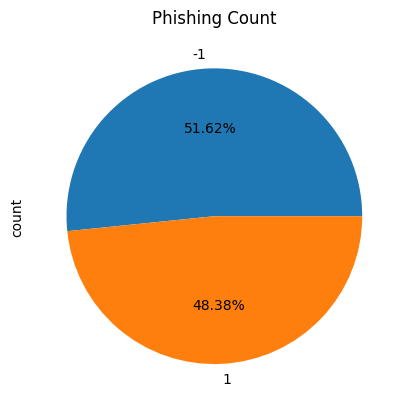

In [64]:
df['class'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Phishing Count")
plt.show()

phishing count is more than the non phishing count

<Axes: xlabel='class'>

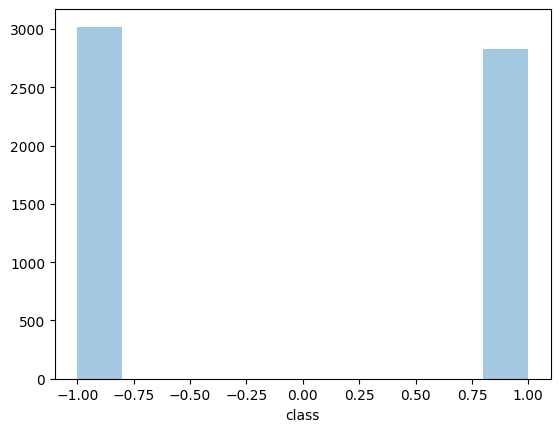

In [65]:
sns.distplot( a=df["class"], hist=True, kde=False, rug=False )

Phishing count is more here also as the class which has 1 is greater than the class which has -1

<Axes: xlabel='class', ylabel='Density'>

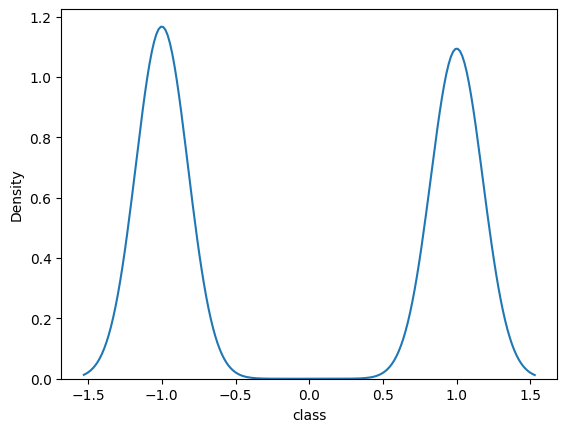

In [66]:
sns.kdeplot(df['class'])


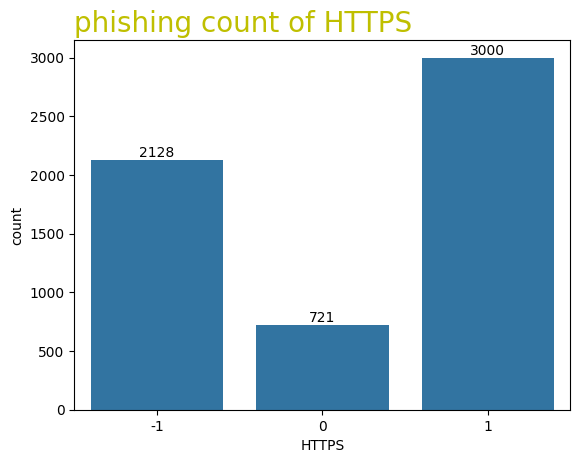

In [67]:
count=sns.countplot(x=df.HTTPS,data=df)
for i in count.containers:
    count.bar_label(i)
plt.title("phishing count of HTTPS",color='y',size=20,loc='left')
plt.show()

    phishing URLS are 2128.
    legitimate HTTPS URLS or non_phishing URLS are 3000.
    Suspicious URLS are 721 (0 indicates a potential risk of features that indicate a potential risk of phishing,
    but they are not confirmed phishing URLS).

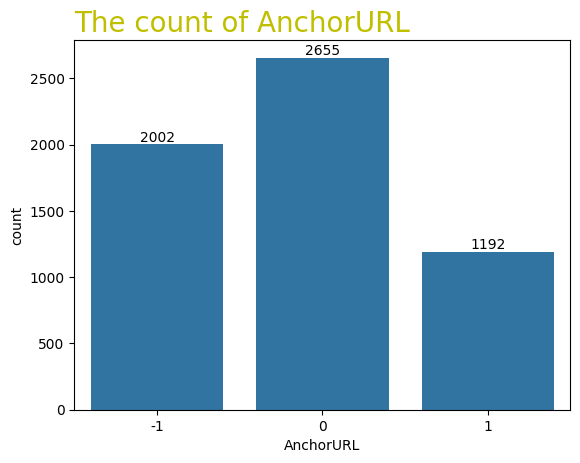

In [68]:
count=sns.countplot(x=df.AnchorURL,data=df)
for i in count.containers:
    count.bar_label(i)
plt.title("The count of AnchorURL ",color='y',size=20,loc='left')
plt.show()

In the AnchorURL suspicious URLS are more than the Non-phishing and phishing URLS

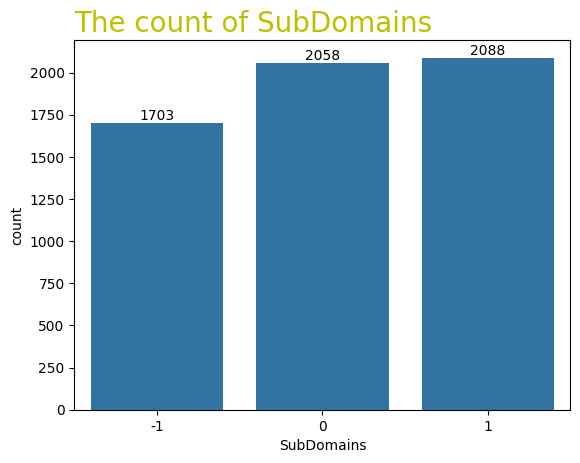

In [69]:
count=sns.countplot(x=df.SubDomains,data=df)
for i in count.containers:
    count.bar_label(i)
plt.title("The count of SubDomains ",color='y',size=20,loc='left')
plt.show()

count of non phishing URLS is more

### Bivariate

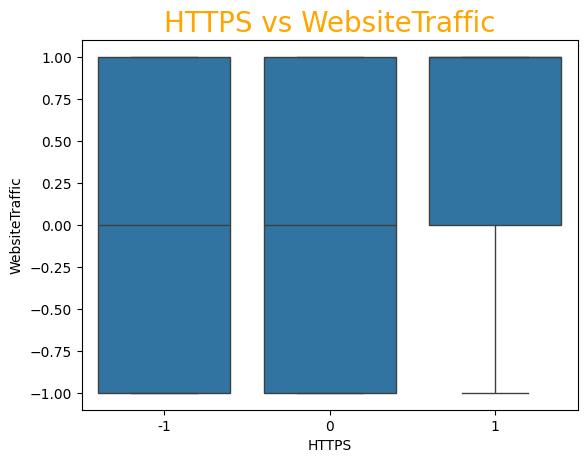

In [70]:
sns.boxplot(x=df.HTTPS,y=df.WebsiteTraffic)
plt.title("HTTPS vs WebsiteTraffic",color='orange',size=20)
plt.show()

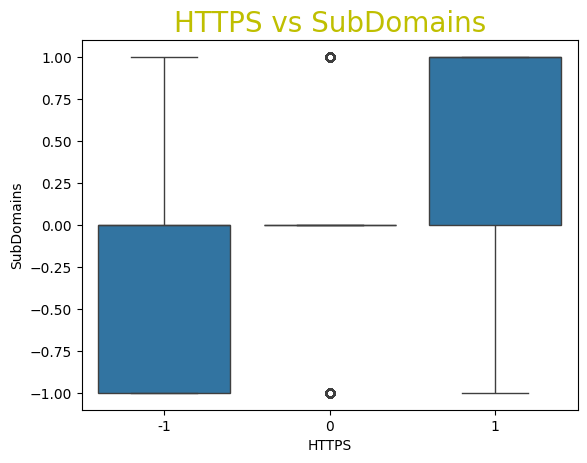

In [71]:
sns.boxplot(x=df.HTTPS,y=df.SubDomains)
plt.title("HTTPS vs SubDomains",color='y',size=20)
plt.show()

There are outliers are in my dataset

<Axes: xlabel='class'>

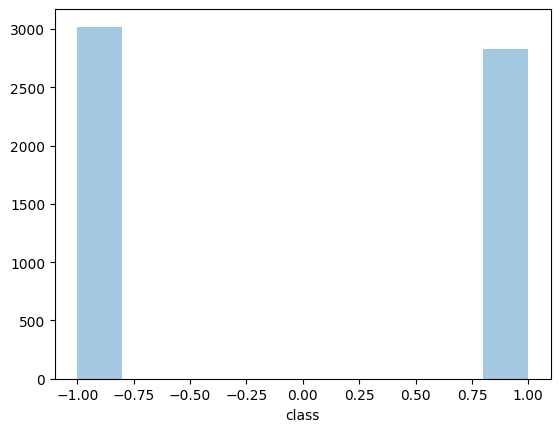

In [72]:
sns.distplot( a=df["class"], hist=True, kde=False, rug=False )

count of phishing URLS is more

<Axes: xlabel='HTTPS'>

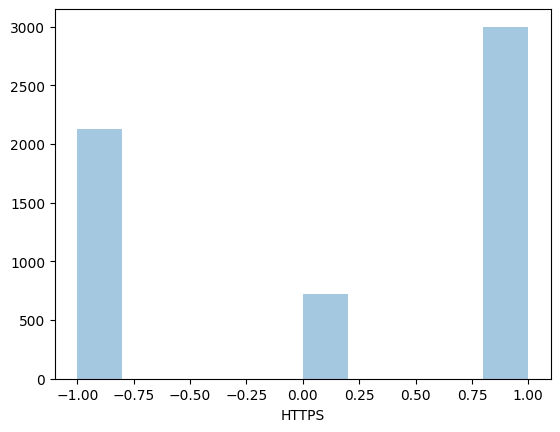

In [73]:
sns.distplot( a=df["HTTPS"], hist=True, kde=False, rug=False )


count of phishing URLS is less in case of HTTPS

 ### Multivariate

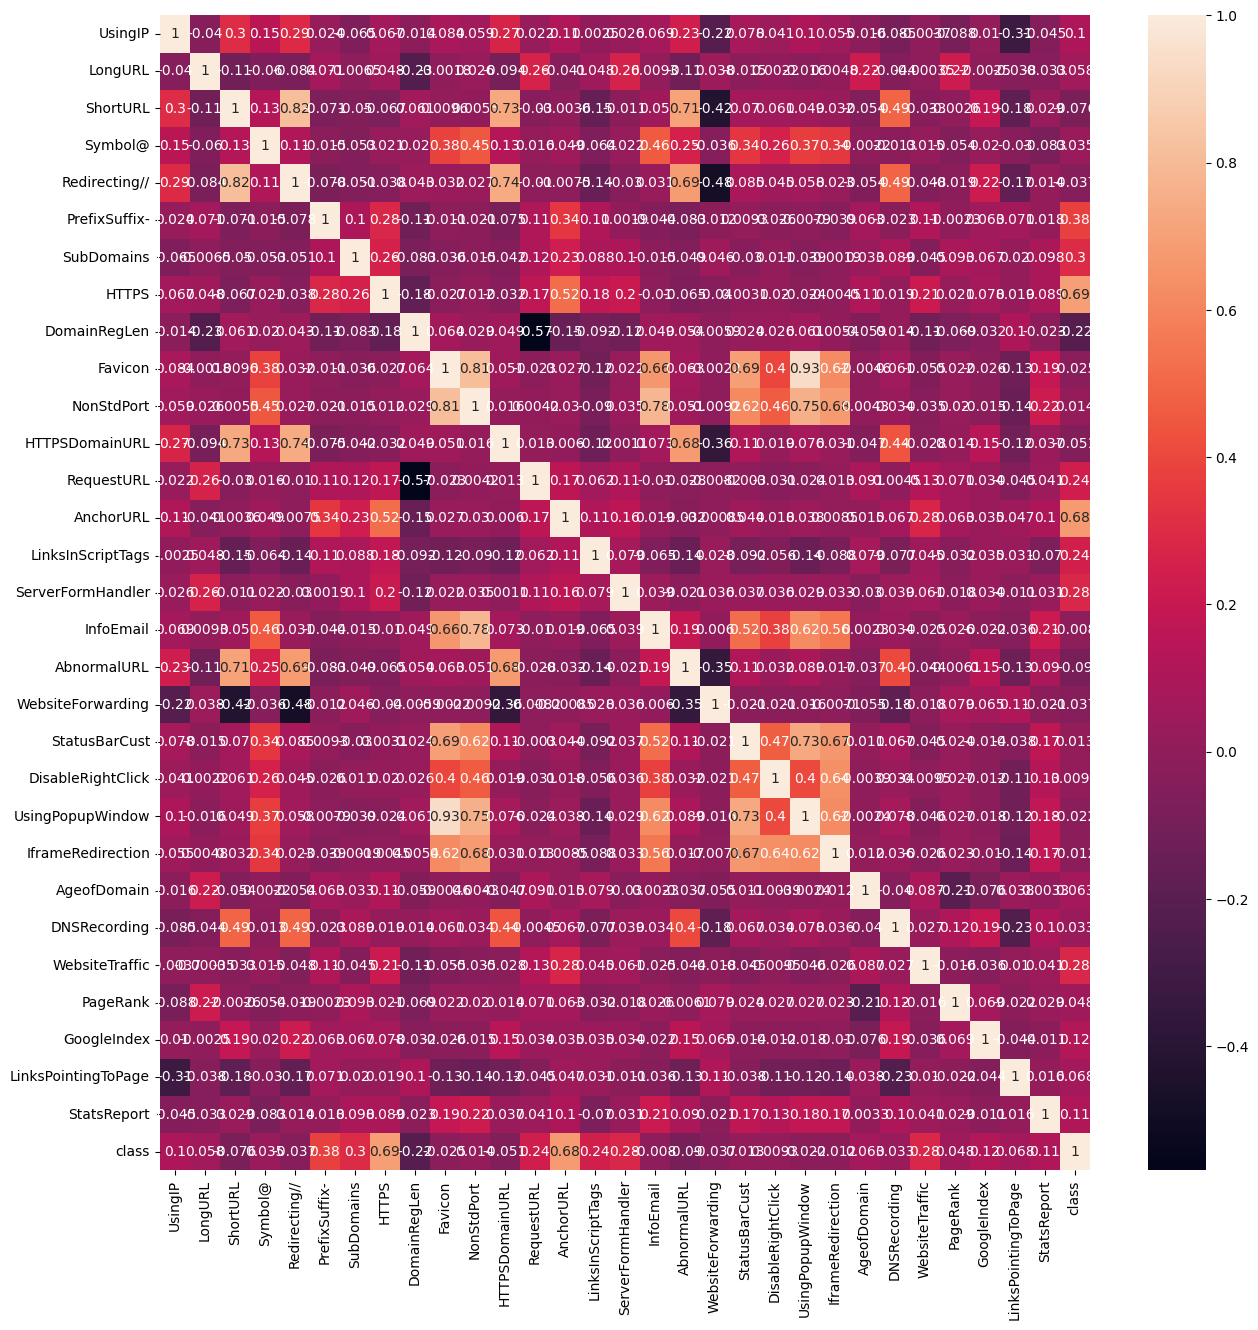

In [74]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [75]:
df.corr()

,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,Favicon,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
UsingIP,1.000000,-0.040473,0.301725,0.148862,0.293266,0.024366,-0.064956,0.067208,-0.013651,0.083762,...,0.099592,0.054807,-0.015805,-0.085114,-0.003703,-0.087927,0.010300,-0.314681,-0.045373,0.104952
LongURL,-0.040473,1.000000,-0.112819,-0.060435,-0.084463,0.070989,-0.006535,0.048342,-0.226193,-0.001824,...,-0.016198,0.004811,0.221336,-0.044279,-0.000348,0.220011,-0.002480,-0.038011,-0.032996,0.058228
ShortURL,0.301725,-0.112819,1.000000,0.133856,0.815809,-0.071278,-0.049859,-0.066683,0.060993,0.009649,...,0.048578,0.032366,-0.053506,0.488871,-0.032635,-0.002555,0.186332,-0.179253,0.028998,-0.076166
Symbol@,0.148862,-0.060435,0.133856,1.000000,0.112493,-0.015395,-0.053146,0.020751,0.020013,0.383249,...,0.366523,0.344610,-0.002238,-0.013184,0.015039,-0.053646,0.019846,-0.029701,-0.082859,0.034757
Redirecting//,0.293266,-0.084463,0.815809,0.112493,1.000000,-0.077538,-0.051302,-0.038359,0.043342,0.032272,...,0.057585,0.023302,-0.054262,0.485620,-0.047766,-0.019120,0.218521,-0.166749,0.013956,-0.036693
PrefixSuffix-,0.024366,0.070989,-0.071278,-0.015395,-0.077538,1.000000,0.104876,0.278177,-0.110907,-0.010905,...,-0.007894,-0.038888,0.063193,-0.022770,0.106466,-0.002263,0.062539,0.071123,0.017894,0.381134
SubDomains,-0.064956,-0.006535,-0.049859,-0.053146,-0.051302,0.104876,1.000000,0.255770,-0.083085,-0.035891,...,-0.038745,-0.001880,0.032986,0.089132,-0.044901,0.093202,0.066567,0.019548,0.097661,0.296214
HTTPS,0.067208,0.048342,-0.066683,0.020751,-0.038359,0.278177,0.255770,1.000000,-0.175864,-0.027138,...,-0.023704,-0.004498,0.107550,0.019273,0.211850,0.020743,0.078182,0.019410,0.089295,0.693228
DomainRegLen,-0.013651,-0.226193,0.060993,0.020013,0.043342,-0.110907,-0.083085,-0.175864,1.000000,0.063998,...,0.061336,0.005354,-0.058693,0.013673,-0.112966,-0.068845,-0.032338,0.103013,-0.022538,-0.218623
Favicon,0.083762,-0.001824,0.009649,0.383249,0.032272,-0.010905,-0.035891,-0.027138,0.063998,1.000000,...,0.933145,0.622273,-0.004568,0.061194,-0.055462,0.021655,-0.025568,-0.127583,0.187324,-0.025457


here in this dataset some features have no good reationship so we can delete those

we can delete the columns based on dependent variable class
 So, here I'm going to delete LongURL,ShortURL,Symbol@, Redirecting //,DomainRegLen, Favicon, UsingPopupWindow, IframeRedirection, LinksPointingToPage

In [76]:
df.drop(columns=['LongURL','Symbol@','ShortURL','Redirecting//','DomainRegLen', 'Favicon', 'UsingPopupWindow', 'IframeRedirection', 'LinksPointingToPage'],inplace=True)


In [77]:
df.head()

,UsingIP,PrefixSuffix-,SubDomains,HTTPS,NonStdPort,HTTPSDomainURL,RequestURL,AnchorURL,LinksInScriptTags,ServerFormHandler,...,WebsiteForwarding,StatusBarCust,DisableRightClick,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,StatsReport,class
0,1,-1,0,1,1,-1,1,0,-1,-1,...,0,1,1,-1,-1,0,-1,1,1,-1
1,1,-1,-1,-1,1,-1,1,0,-1,-1,...,0,1,1,1,-1,1,-1,1,-1,-1
2,1,-1,-1,-1,1,-1,-1,0,0,-1,...,0,1,1,-1,-1,1,-1,1,1,-1
3,1,-1,1,1,1,1,1,0,0,-1,...,0,-1,1,-1,-1,0,-1,1,1,1
4,-1,-1,1,1,1,-1,1,0,0,-1,...,0,1,1,1,1,1,-1,1,-1,1


In [78]:
df.shape

(5849, 22)

### Handling Outliers

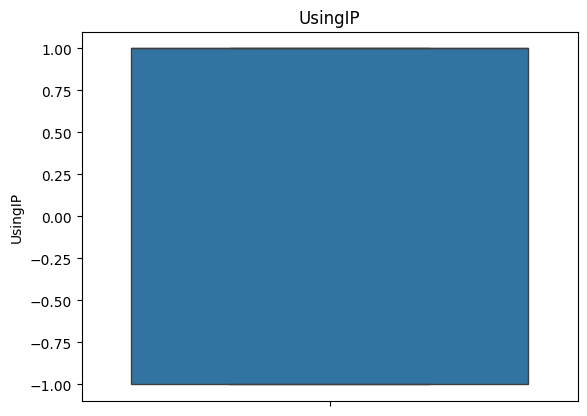

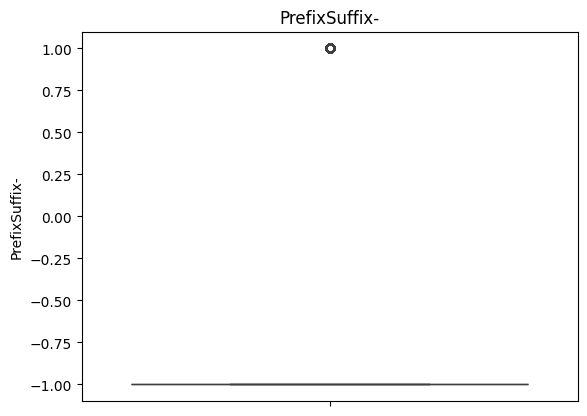

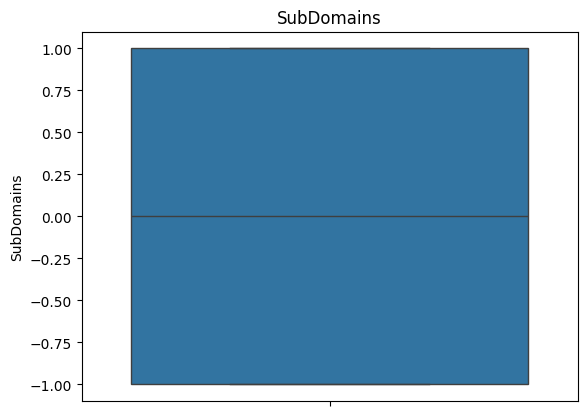

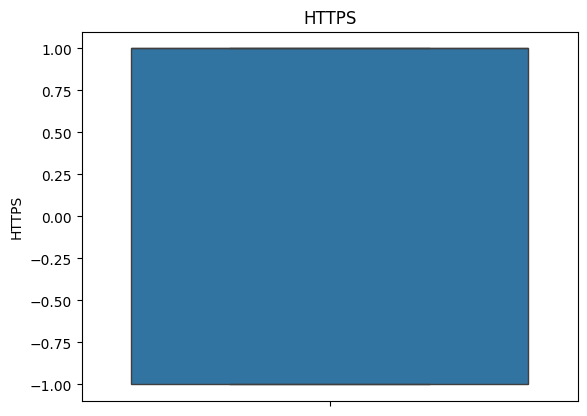

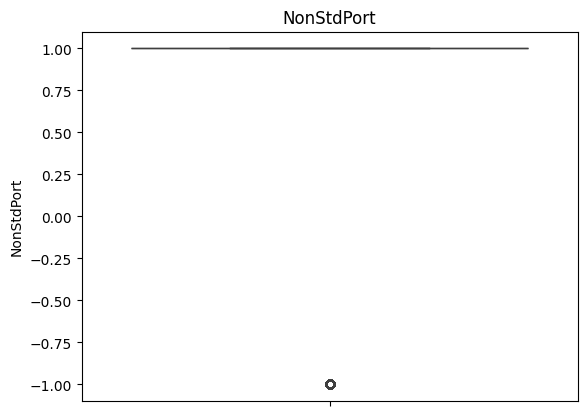

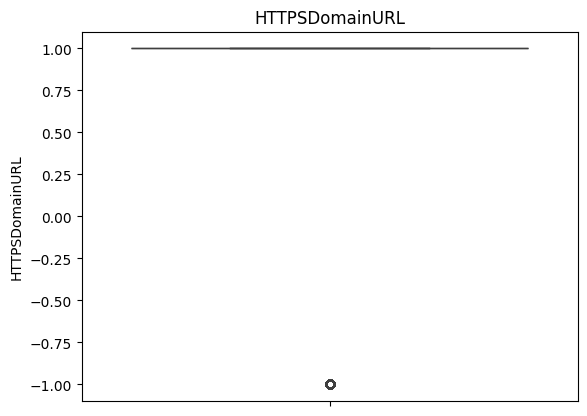

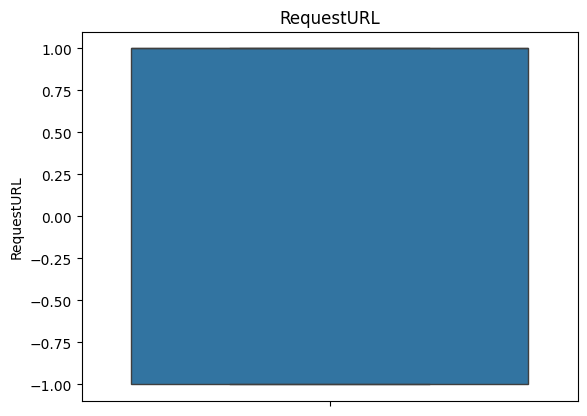

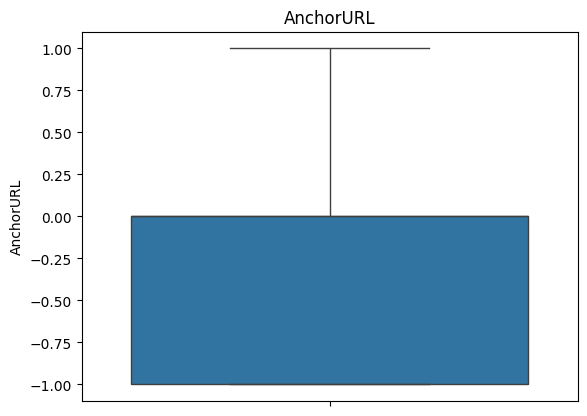

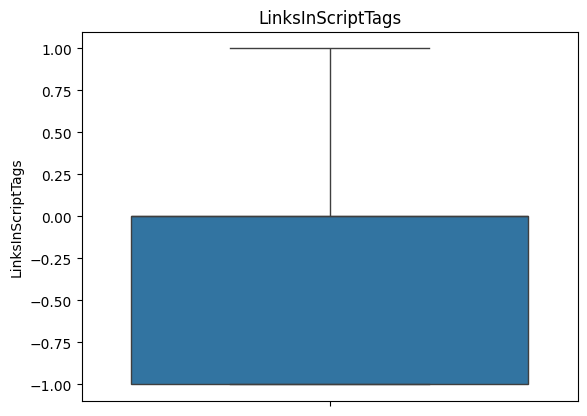

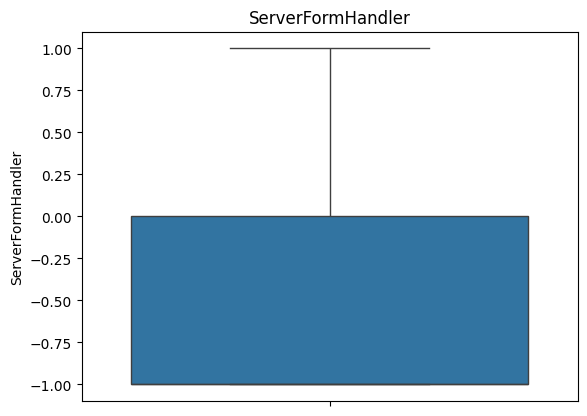

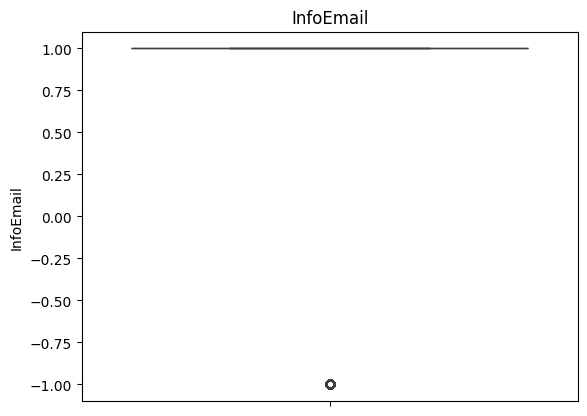

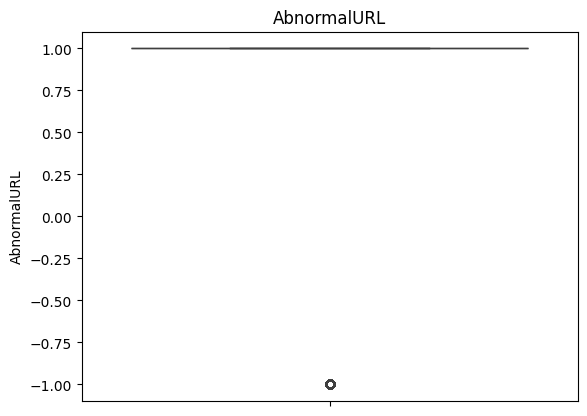

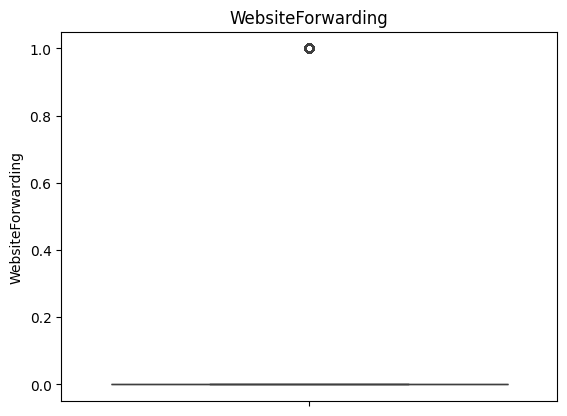

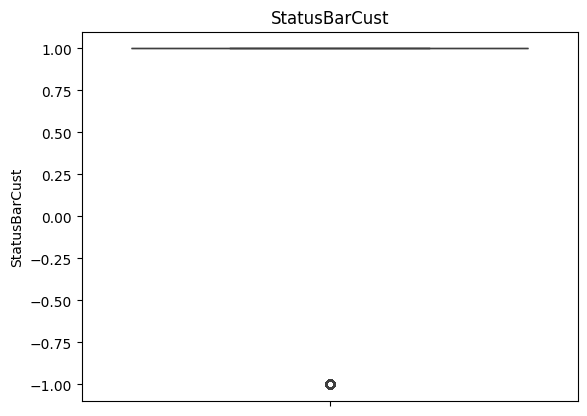

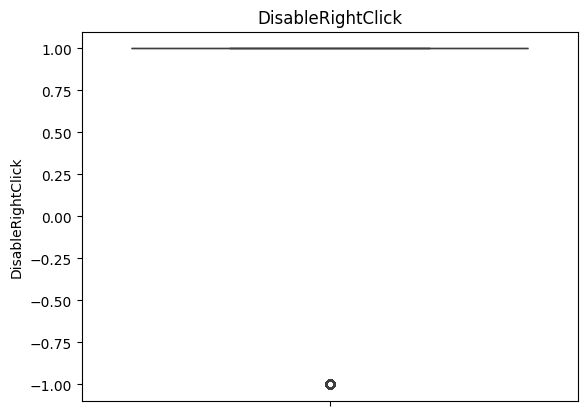

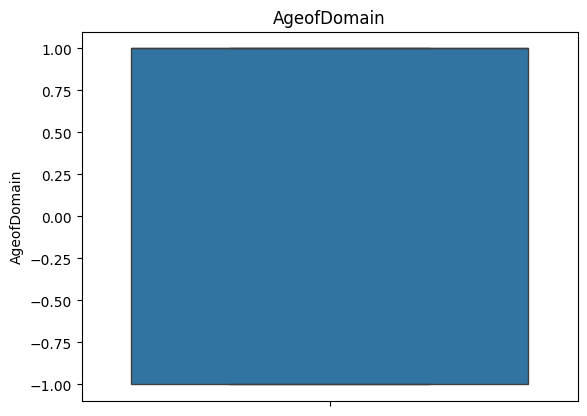

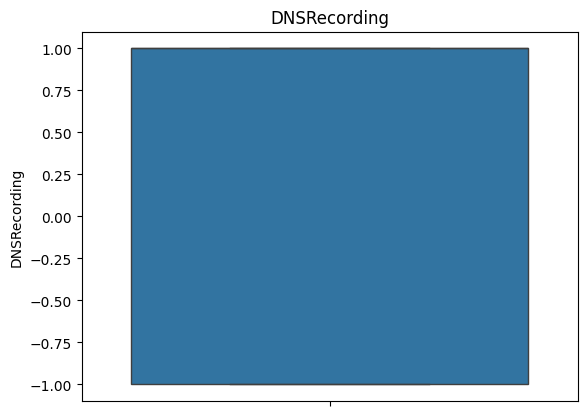

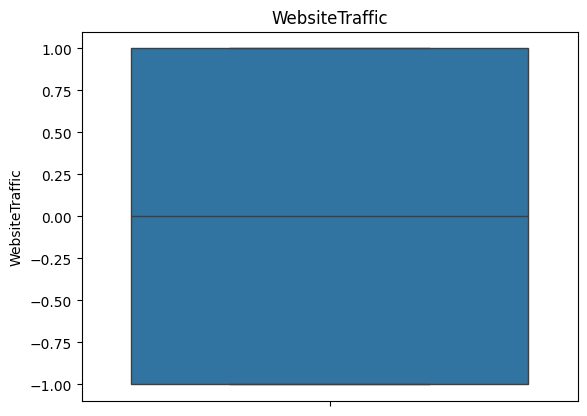

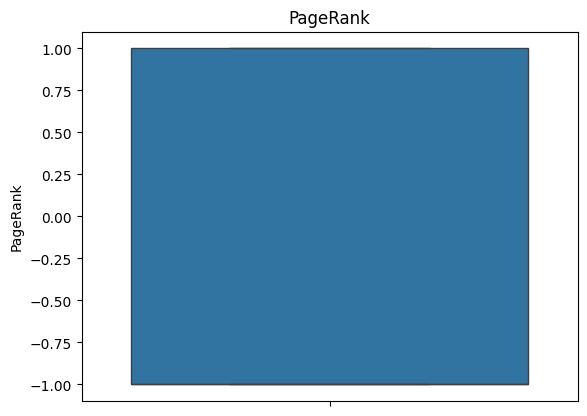

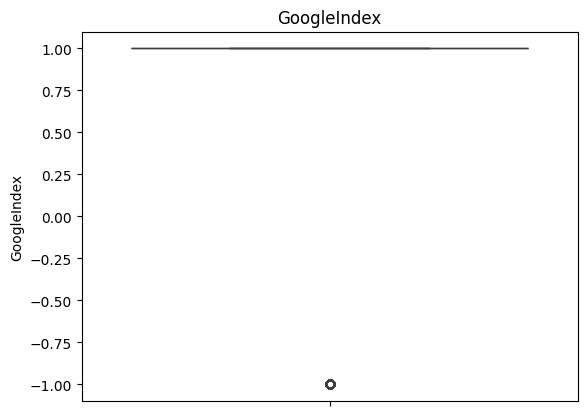

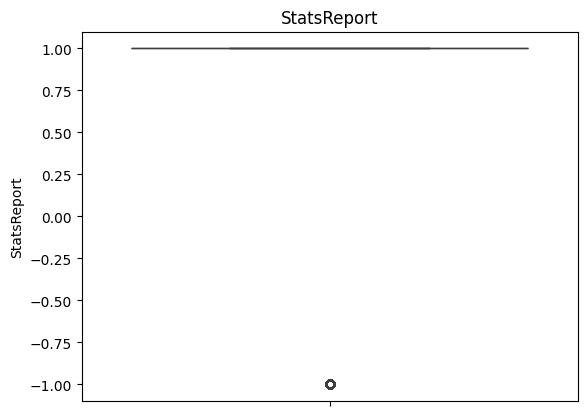

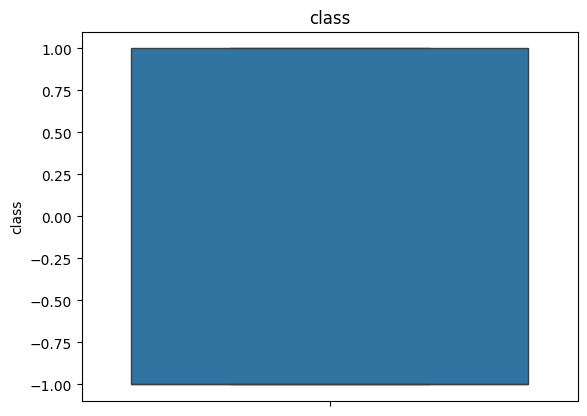

In [79]:
for i in df.columns:
    if type(df[i][0])!=str:
        sns.boxplot(df[i])
        plt.title(i)
        plt.show()

We had outliers in our dataset
'PrefixSuffix-','NonStdPort', 'HTTPSDomainURL','AnchorURL','ServerFormHandler','InfoEmail','AbnormalURL','WebsiteForwarding','StatusBarCust','DisableRightClick','GoogleIndex','StatsReport'


In [80]:
# Z-score method
z_scores = np.abs((df - df.mean()) / df.std())
outliers = df[z_scores > 3]

In [81]:
# IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))]

In [82]:
#Handle outliers
# Remove outliers
df_cleaned = df.drop(outliers.index)

In [83]:
# Replace outliers with median
df_cleaned = df.copy()
df_cleaned=np.where(z_scores>3,df.median(),df)

In [84]:
# Apply log transformation
df_cleaned = np.log1p(df+0.0001)


In [85]:
# Validate the results
print(df_cleaned.describe())

           UsingIP  PrefixSuffix-   SubDomains        HTTPS   NonStdPort  \
count  5849.000000    5849.000000  5849.000000  5849.000000  5849.000000   
mean     -3.600763      -8.023406    -2.434195    -2.995374    -0.903492   
std       4.908301       3.216801     4.353017     4.705445     3.642214   
min      -9.210340      -9.210340    -9.210340    -9.210340    -9.210340   
25%      -9.210340      -9.210340    -9.210340    -9.210340     0.693197   
50%       0.693197      -9.210340     0.000100     0.693197     0.693197   
75%       0.693197      -9.210340     0.693197     0.693197     0.693197   
max       0.693197       0.693197     0.693197     0.693197     0.693197   

       HTTPSDomainURL   RequestURL    AnchorURL  LinksInScriptTags  \
count     5849.000000  5849.000000  5849.000000        5849.000000   
mean        -1.022016    -3.660025    -3.011206          -3.341746   
std          3.747949     4.915881     4.479933           4.606370   
min         -9.210340    -9.210340 

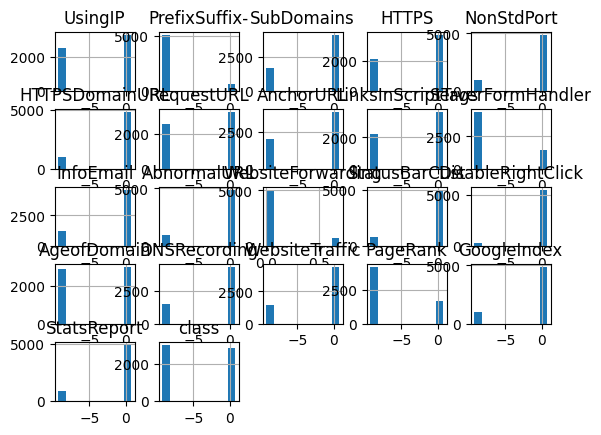

In [86]:
df_cleaned.hist()
plt.show()

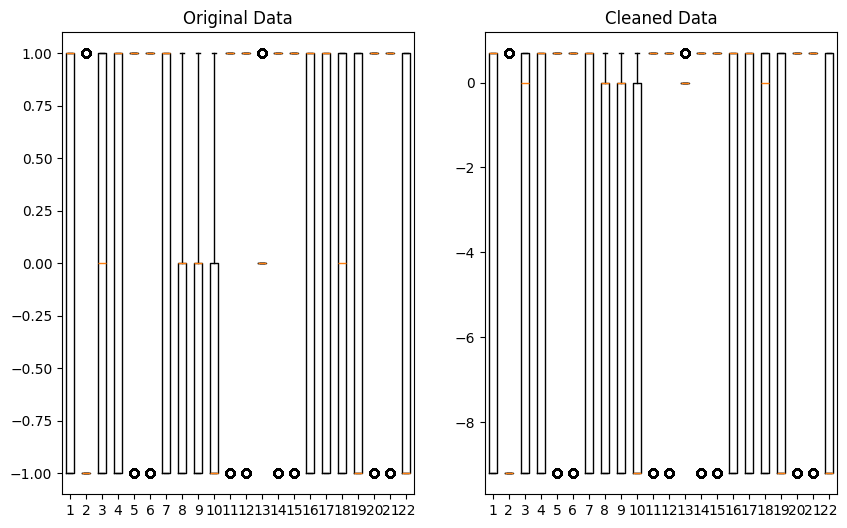

In [87]:

# Verify the results using box plots

plt.figure(figsize=(10, 6))


# Original data

plt.subplot(1, 2, 1)

plt.boxplot(df.values)

plt.title('Original Data')


# Cleaned data

plt.subplot(1, 2, 2)

plt.boxplot(df_cleaned.values)

plt.title('Cleaned Data')

plt.show()


# Splitting the data
The data is split into train & test sets, 80-20 split.

In [88]:
X = df.drop(["class"],axis =1)
y = df["class"]

## Scaling

In [89]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
clmn_names=X.columns
scaled=scaler.fit_transform(X)
features=pd.DataFrame(scaled,columns=clmn_names)
features

,UsingIP,PrefixSuffix-,SubDomains,HTTPS,NonStdPort,HTTPSDomainURL,RequestURL,AnchorURL,LinksInScriptTags,ServerFormHandler,...,AbnormalURL,WebsiteForwarding,StatusBarCust,DisableRightClick,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,StatsReport
0,0.874911,-0.369011,-0.082035,0.920511,0.438422,-2.184935,0.885618,0.190783,-1.108454,-0.550407,...,0.437867,-0.389656,0.400932,0.227157,-1.021604,-1.676432,-0.283176,-0.636128,0.451107,0.422518
1,0.874911,-0.369011,-1.328329,-1.243069,0.438422,-2.184935,0.885618,0.190783,-1.108454,-0.550407,...,-2.283797,-0.389656,0.400932,0.227157,0.978852,-1.676432,0.927567,-0.636128,0.451107,-2.366766
2,0.874911,-0.369011,-1.328329,-1.243069,0.438422,-2.184935,-1.129155,0.190783,0.190814,-0.550407,...,0.437867,-0.389656,0.400932,0.227157,-1.021604,-1.676432,0.927567,-0.636128,0.451107,0.422518
3,0.874911,-0.369011,1.164259,0.920511,0.438422,0.457680,0.885618,0.190783,0.190814,-0.550407,...,0.437867,-0.389656,-2.494191,0.227157,-1.021604,-1.676432,-0.283176,-0.636128,0.451107,0.422518
4,-1.142973,-0.369011,1.164259,0.920511,0.438422,-2.184935,0.885618,0.190783,0.190814,-0.550407,...,-2.283797,-0.389656,0.400932,0.227157,0.978852,0.596505,0.927567,-0.636128,0.451107,-2.366766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5844,0.874911,-0.369011,-1.328329,-1.243069,0.438422,-2.184935,0.885618,-1.186860,1.490083,-0.550407,...,-2.283797,2.566369,0.400932,0.227157,0.978852,-1.676432,-0.283176,-0.636128,0.451107,0.422518
5845,0.874911,-0.369011,1.164259,-1.243069,0.438422,0.457680,0.885618,0.190783,1.490083,-0.550407,...,0.437867,-0.389656,0.400932,0.227157,0.978852,0.596505,-0.283176,-0.636128,0.451107,0.422518
5846,0.874911,-0.369011,-1.328329,0.920511,0.438422,0.457680,-1.129155,0.190783,0.190814,-0.550407,...,0.437867,-0.389656,0.400932,0.227157,0.978852,0.596505,-0.283176,-0.636128,0.451107,0.422518
5847,-1.142973,-0.369011,1.164259,-1.243069,0.438422,-2.184935,-1.129155,0.190783,-1.108454,-0.550407,...,0.437867,2.566369,0.400932,0.227157,-1.021604,0.596505,0.927567,-0.636128,0.451107,0.422518


## Train Test and Split

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4679, 21), (4679,), (1170, 21), (1170,))

In [91]:
X_train.shape

(4679, 21)

In [92]:
y_train.shape

(4679,)

In [93]:
X_test.shape

(1170, 21)

In [94]:
y_test.shape

(1170,)

In [95]:
pip install imblearn

In [96]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy=1)
X_train,y_train=smote.fit_resample(X_train,y_train)
pd.DataFrame(y_train).value_counts()

,count
class,
-1,2388
1,2388


## Model Building & Training:
   Supervised machine learning is one of the most commonly used and successful types of machine learning. Supervised learning is used whenever we want to predict a certain outcome/label from a given set of features, and we have examples of features-label pairs. We build a machine learning model from these features-label pairs, which comprise our training set. Our goal is to make accurate predictions for new, never-before-seen data.

   There are two major types of supervised machine learning problems, called classification and regression. Our data set comes under regression problem, as the prediction of suicide rate is a continuous number, or a floating-point number in programming terms. The supervised machine learning models (regression) considered to train the dataset in this notebook are:

1. Logistic Regression
2. k-Nearest Neighbors
3. Naive Bayes
4. Decision Tree
5. Random Forest
6. Gradient Boosting
7. Multi Layer perceptron Classifier
8. Support Vector Machine Classifier

  The metrics considered to evaluate the model performance are Accuracy & F1 score, confusion matrix.

## Logistic Regression

Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. Logistic Regression is much similar to the Linear Regression except that how they are used. Linear Regression is used for solving Regression problems, whereas Logistic regression is used for solving the classification problems.

In [97]:
from sklearn.linear_model import LogisticRegression
# instantiate the model
log = LogisticRegression()
# fit the model
Log=log.fit(X_train,y_train)
predict=Log.predict(X_test)

In [98]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [99]:
accuracy_score(y_test,predict)

0.9264957264957265

In [100]:
confusion_matrix(y_test,predict)

array([[578,  53],
       [ 33, 506]])

computing the classification report of the model

In [101]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

          -1       0.95      0.92      0.93       631
           1       0.91      0.94      0.92       539

    accuracy                           0.93      1170
   macro avg       0.93      0.93      0.93      1170
weighted avg       0.93      0.93      0.93      1170



##  K-Nearest Neighbors : Classifier

K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique. K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.

In [102]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
Knn=knn.fit(X_train,y_train)
k_predict=Knn.predict(X_test)

In [103]:
accuracy_score(y_test,k_predict)

0.9196581196581196

In [104]:
confusion_matrix(y_test,k_predict)

array([[587,  44],
       [ 50, 489]])

In [105]:
print(classification_report(y_test,k_predict))

              precision    recall  f1-score   support

          -1       0.92      0.93      0.93       631
           1       0.92      0.91      0.91       539

    accuracy                           0.92      1170
   macro avg       0.92      0.92      0.92      1170
weighted avg       0.92      0.92      0.92      1170



## Naive Bayes : Classifier

Naïve Bayes algorithm is a supervised learning algorithm, which is based on Bayes theorem and used for solving classification problems.It is mainly used in text, image classification that includes a high-dimensional training dataset. Naïve Bayes Classifier is one of the simple and most effective Classification algorithms which helps in building the fast machine learning models that can make quick predictions.

In [106]:
# Naive Bayes Classifier Model
from sklearn.naive_bayes import GaussianNB

# instantiate the model
nb = GaussianNB()

# fit the model
Nb=nb.fit(X_train,y_train)
n_predict=nb.predict(X_test)

In [107]:
accuracy_score(y_test,n_predict)

0.6632478632478632

In [108]:
confusion_matrix(y_test,n_predict)

array([[631,   0],
       [394, 145]])

In [109]:
print(classification_report(y_test,n_predict))

              precision    recall  f1-score   support

          -1       0.62      1.00      0.76       631
           1       1.00      0.27      0.42       539

    accuracy                           0.66      1170
   macro avg       0.81      0.63      0.59      1170
weighted avg       0.79      0.66      0.61      1170



##  Decision Trees : Classifier

Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

In [110]:
# Decision Tree Classifier model
from sklearn.tree import DecisionTreeClassifier

# instantiate the model
dt = DecisionTreeClassifier(max_depth=30)

# fit the model
Dt=dt.fit(X_train, y_train)
d_predict=Dt.predict(X_test)


In [111]:
accuracy_score(y_test,d_predict)

0.9145299145299145

In [112]:
confusion_matrix(y_test,d_predict)

array([[590,  41],
       [ 59, 480]])

In [113]:
print(classification_report(y_test,d_predict))

              precision    recall  f1-score   support

          -1       0.91      0.94      0.92       631
           1       0.92      0.89      0.91       539

    accuracy                           0.91      1170
   macro avg       0.92      0.91      0.91      1170
weighted avg       0.91      0.91      0.91      1170



##  Random Forest : Classifier

Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.

In [114]:
# Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(n_estimators=10)

# fit the model
Forest=forest.fit(X_train,y_train)
f_predict=Forest.predict(X_test)

In [115]:
accuracy_score(y_test,f_predict)

0.9290598290598291

In [116]:
confusion_matrix(y_test,f_predict)

array([[588,  43],
       [ 40, 499]])

In [117]:
print(classification_report(y_test,f_predict))

              precision    recall  f1-score   support

          -1       0.94      0.93      0.93       631
           1       0.92      0.93      0.92       539

    accuracy                           0.93      1170
   macro avg       0.93      0.93      0.93      1170
weighted avg       0.93      0.93      0.93      1170



In [118]:
from sklearn.model_selection import cross_val_score
cv=cross_val_score(Forest,X_train,y_train,cv=11)
np.mean(cv)

0.9348843592447597

## Gradient Boosting Classifier
Gradient boosting classifiers are a group of machine learning algorithms that combine many weak learning models together to
create a strong predictive model.Decision trees are usually used when doing gradient boosting.
Boosting algorithms play a crucial role in dealing with bias variance trade-off.  
Unlike bagging algorithms, which only controls for high variance in a model, boosting controls both the aspects (bias & variance),
and is considered to be more effective.

In [119]:
# Gradient Boosting Classifier Model
from sklearn.ensemble import GradientBoostingClassifier

# instantiate the model
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

# fit the model
Gbc=gbc.fit(X_train,y_train)
g_predict=Gbc.predict(X_test)

In [120]:
accuracy_score(y_test,g_predict)

0.9478632478632478

In [121]:
confusion_matrix(y_test,g_predict)

array([[599,  32],
       [ 29, 510]])

In [122]:
print(classification_report(y_test, g_predict))

              precision    recall  f1-score   support

          -1       0.95      0.95      0.95       631
           1       0.94      0.95      0.94       539

    accuracy                           0.95      1170
   macro avg       0.95      0.95      0.95      1170
weighted avg       0.95      0.95      0.95      1170



##  Multi-layer Perceptron classifier

MLPClassifier stands for Multi-layer Perceptron classifier which in the name itself connects to a Neural Network. Unlike other classification algorithms such as Support Vectors or Naive Bayes Classifier, MLPClassifier relies on an underlying Neural Network to perform the task of classification.


In [123]:
# Multi-layer Perceptron Classifier Model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier()
#mlp = GridSearchCV(mlpc, parameter_space)

# fit the model
Mlp=mlp.fit(X_train,y_train)
m_predict=Mlp.predict(X_test)

In [124]:
accuracy_score(y_test,m_predict)

0.9376068376068376

In [125]:
confusion_matrix(y_test,m_predict)

array([[594,  37],
       [ 36, 503]])

In [126]:
print(classification_report(y_test,m_predict))

              precision    recall  f1-score   support

          -1       0.94      0.94      0.94       631
           1       0.93      0.93      0.93       539

    accuracy                           0.94      1170
   macro avg       0.94      0.94      0.94      1170
weighted avg       0.94      0.94      0.94      1170



##   Support Vector Machine : Classifier

Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems.
The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into
classes so that we can easily put the new data point in the correct category in the future.

In [127]:
# Support Vector Classifier model
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'gamma': [0.1],'kernel': ['rbf','linear']}

svc = GridSearchCV(SVC(), param_grid)

# fitting the model for grid search
Svc=svc.fit(X_train, y_train)
s_predict=Svc.predict(X_test)

In [128]:
accuracy_score(y_test,s_predict)

0.9418803418803419

In [129]:
confusion_matrix(y_test,s_predict)

array([[588,  43],
       [ 25, 514]])

In [130]:
print(classification_report(y_test, s_predict))

              precision    recall  f1-score   support

          -1       0.96      0.93      0.95       631
           1       0.92      0.95      0.94       539

    accuracy                           0.94      1170
   macro avg       0.94      0.94      0.94      1170
weighted avg       0.94      0.94      0.94      1170



##  Comparision of Models
To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.

In [131]:
# Instantiate the models
logistic_regression = LogisticRegression()
knn = KNeighborsClassifier()
naive_bayes = GaussianNB()
decision_tree = DecisionTreeClassifier(max_depth=30)
random_forest = RandomForestClassifier(n_estimators=10)
gradient_boosting = GradientBoostingClassifier(max_depth=4, learning_rate=0.7)
mlp = MLPClassifier()
svc = SVC()

# Train and predict for each model
models = [
    ("Logistic Regression", logistic_regression),
    ("K-Nearest Neighbors", knn),
    ("Naive Bayes", naive_bayes),
    ("Decision Tree", decision_tree),
    ("Random Forest", random_forest),
    ("Gradient Boosting", gradient_boosting),
    ("Multi-Layer Perceptron", mlp),
    ("Support Vector", svc)
]

for model_name, model in models:
    print(f"Model: {model_name}")

    # Fit the model
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    classification = classification_report(y_test, y_pred)

    print(f"Accuracy: {accuracy}")
    print(f"Confusion Matrix:\n{confusion}")
    print(f"Classification Report:\n{classification}")
    print("-" * 50)

Model: Logistic Regression
Accuracy: 0.9264957264957265
Confusion Matrix:
[[578  53]
 [ 33 506]]
Classification Report:
              precision    recall  f1-score   support

          -1       0.95      0.92      0.93       631
           1       0.91      0.94      0.92       539

    accuracy                           0.93      1170
   macro avg       0.93      0.93      0.93      1170
weighted avg       0.93      0.93      0.93      1170

--------------------------------------------------
Model: K-Nearest Neighbors
Accuracy: 0.9196581196581196
Confusion Matrix:
[[587  44]
 [ 50 489]]
Classification Report:
              precision    recall  f1-score   support

          -1       0.92      0.93      0.93       631
           1       0.92      0.91      0.91       539

    accuracy                           0.92      1170
   macro avg       0.92      0.92      0.92      1170
weighted avg       0.92      0.92      0.92      1170

--------------------------------------------------
Mode

Printing in sorted order

In [132]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

logistic_regression = LogisticRegression()
knn = KNeighborsClassifier()
naive_bayes = GaussianNB()
decision_tree = DecisionTreeClassifier(max_depth=30)
random_forest = RandomForestClassifier(n_estimators=10)
gradient_boosting = GradientBoostingClassifier(max_depth=4, learning_rate=0.7)
mlp = MLPClassifier()
svc = SVC()

# Train and predict for each model
models = [
    ("Logistic Regression", logistic_regression),
    ("K-Nearest Neighbors", knn),
    ("Naive Bayes", naive_bayes),
    ("Decision Tree", decision_tree),
    ("Random Forest", random_forest),
    ("Gradient Boosting", gradient_boosting),
    ("Multi-Layer Perceptron", mlp),
    ("Support Vector", svc)
]

results = []

for model_name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append((model_name, model, accuracy))

# Sort results based on accuracy
results.sort(key=lambda x: x[2], reverse=True)

for model_name, model, accuracy in results:
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy}")
    y_pred = model.predict(X_test)
    confusion = confusion_matrix(y_test, y_pred)
    classification = classification_report(y_test, y_pred)
    print(f"Confusion Matrix:\n{confusion}")
    print(f"Classification Report:\n{classification}")
    print("-" * 50)

Model: Gradient Boosting
Accuracy: 0.9478632478632478
Confusion Matrix:
[[599  32]
 [ 29 510]]
Classification Report:
              precision    recall  f1-score   support

          -1       0.95      0.95      0.95       631
           1       0.94      0.95      0.94       539

    accuracy                           0.95      1170
   macro avg       0.95      0.95      0.95      1170
weighted avg       0.95      0.95      0.95      1170

--------------------------------------------------
Model: Multi-Layer Perceptron
Accuracy: 0.9461538461538461
Confusion Matrix:
[[594  37]
 [ 26 513]]
Classification Report:
              precision    recall  f1-score   support

          -1       0.96      0.94      0.95       631
           1       0.93      0.95      0.94       539

    accuracy                           0.95      1170
   macro avg       0.95      0.95      0.95      1170
weighted avg       0.95      0.95      0.95      1170

--------------------------------------------------
Mod

## Testing the Model

In [133]:
X_train.head(20)

,UsingIP,PrefixSuffix-,SubDomains,HTTPS,NonStdPort,HTTPSDomainURL,RequestURL,AnchorURL,LinksInScriptTags,ServerFormHandler,...,AbnormalURL,WebsiteForwarding,StatusBarCust,DisableRightClick,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,StatsReport
0,-1.142973,-0.369011,1.164259,-0.161279,-2.280909,0.457680,-1.129155,-1.186860,-1.108454,-0.550407,...,0.437867,-0.389656,-2.494191,-4.402248,0.978852,0.596505,-0.283176,-0.636128,-2.216767,0.422518
1,0.874911,2.709944,1.164259,-1.243069,0.438422,0.457680,0.885618,0.190783,0.190814,-0.550407,...,0.437867,-0.389656,0.400932,0.227157,0.978852,0.596505,-0.283176,1.572010,0.451107,0.422518
2,-1.142973,2.709944,1.164259,0.920511,0.438422,-2.184935,-1.129155,1.568426,1.490083,-0.550407,...,-2.283797,-0.389656,0.400932,0.227157,-1.021604,-1.676432,0.927567,-0.636128,-2.216767,0.422518
3,0.874911,-0.369011,-1.328329,0.920511,0.438422,0.457680,0.885618,0.190783,1.490083,2.099249,...,-2.283797,-0.389656,-2.494191,0.227157,-1.021604,-1.676432,-0.283176,-0.636128,0.451107,-2.366766
4,-1.142973,-0.369011,-0.082035,-1.243069,0.438422,0.457680,-1.129155,-1.186860,-1.108454,-0.550407,...,0.437867,-0.389656,0.400932,0.227157,0.978852,0.596505,0.927567,-0.636128,0.451107,-2.366766
5,-1.142973,-0.369011,1.164259,0.920511,0.438422,-2.184935,0.885618,0.190783,0.190814,0.774421,...,-2.283797,2.566369,0.400932,0.227157,-1.021604,-1.676432,-1.493919,1.572010,0.451107,0.422518
6,0.874911,-0.369011,-0.082035,-1.243069,0.438422,0.457680,0.885618,-1.186860,0.190814,-0.550407,...,0.437867,-0.389656,0.400932,0.227157,-1.021604,0.596505,0.927567,1.572010,0.451107,-2.366766
7,0.874911,2.709944,1.164259,0.920511,0.438422,0.457680,0.885618,1.568426,0.190814,-0.550407,...,0.437867,-0.389656,0.400932,0.227157,-1.021604,0.596505,0.927567,-0.636128,0.451107,0.422518
8,0.874911,-0.369011,-1.328329,0.920511,0.438422,0.457680,-1.129155,0.190783,-1.108454,-0.550407,...,0.437867,2.566369,0.400932,0.227157,-1.021604,-1.676432,0.927567,-0.636128,-2.216767,0.422518
9,0.874911,-0.369011,-0.082035,0.920511,0.438422,0.457680,0.885618,1.568426,1.490083,2.099249,...,0.437867,2.566369,0.400932,0.227157,0.978852,0.596505,0.927567,-0.636128,0.451107,0.422518


In [134]:
X_train.iloc[480]

,480
UsingIP,-1.142973
PrefixSuffix-,-0.369011
SubDomains,-1.328329
HTTPS,-1.243069
NonStdPort,0.438422
HTTPSDomainURL,0.457680
RequestURL,-1.129155
AnchorURL,-1.186860
LinksInScriptTags,-1.108454
ServerFormHandler,-0.550407


In [135]:
Gbc.predict([[1,-1,1,1,1,1,1,1,0,1,1,1,1,1,1,-1,1,1,-1,1,1]])

array([1])

## Storing Best Model

In [136]:
import pickle

# dump information to that file
pickle.dump(Gbc, open('Phishing_model.pkl', 'wb'))

##  Conclusion

1. The final take away form this project is to explore various machine learning models, perform Exploratory Data Analysis on phishing dataset and understanding their features.
2. Creating this notebook helped me to learn a lot about the features affecting the models to detect whether URL is safe or not, also I came to know how to tuned model and how they affect the model performance.
3. The final conclusion on the Phishing dataset is that the some feature like "HTTTPS", "AnchorURL", "WebsiteTraffic" have more importance to classify URL is phishing URL or not.
4. Gradient Boosting Classifier correctly classify URL upto 94.52% respective classes and hence reduces the chance of malicious attachments.